0
16
10
-6
-16
0
6
-10
-10
-6
0
-4
6
10
4
0


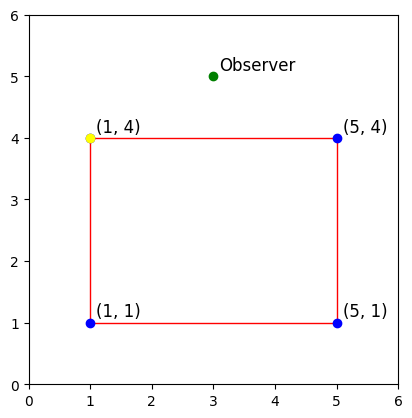

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to check visibility of corners
def is_corner_visible(corner, corners, observer):
    p1, p2 = corners[0], corners[1]
    p3, p4 = corners[2], corners[3]
    
    # Vectors from observer to corners
    vo = np.array(corner) - np.array(observer)
    v1 = np.array(p1) - np.array(observer)
    v2 = np.array(p2) - np.array(observer)
    v3 = np.array(p3) - np.array(observer)
    v4 = np.array(p4) - np.array(observer)
    
    # Cross products to check which side the observer is on relative to each edge
    cross1 = np.cross(vo, v1)
    cross2 = np.cross(vo, v2)
    cross3 = np.cross(vo, v3)
    cross4 = np.cross(vo, v4)
    print(cross1)
    print(cross2)
    print(cross3)
    print(cross4)
    
    # If observer is on the same side for all edges, the corner is visible
    return (cross1 >= 0 and cross2 >= 0 and cross3 >= 0 and cross4 >= 0)

# Define the corners of the rectangle
corners = [(1, 1), (5, 1), (5, 4), (1, 4)]

# Define an observer position
observer = (3, 5)

# Determine visibility of each corner
visible_corners = []
for corner in corners:
    if is_corner_visible(corner, corners, observer):
        visible_corners.append(corner)

# Plot the rectangle and observer position
rectangle = plt.Polygon(corners, fill=None, edgecolor='r')
plt.gca().add_patch(rectangle)

# Plot the corners
for corner in corners:
    plt.scatter(*corner, color='blue')
    plt.text(corner[0] + 0.1, corner[1] + 0.1, f'{corner}', fontsize=12)

# Plot the observer position
plt.scatter(*observer, color='green')
plt.text(observer[0] + 0.1, observer[1] + 0.1, 'Observer', fontsize=12)

# Highlight visible corners
for corner in visible_corners:
    plt.scatter(*corner, color='yellow')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Visible corners: [array([5, 1]), array([5, 3])]


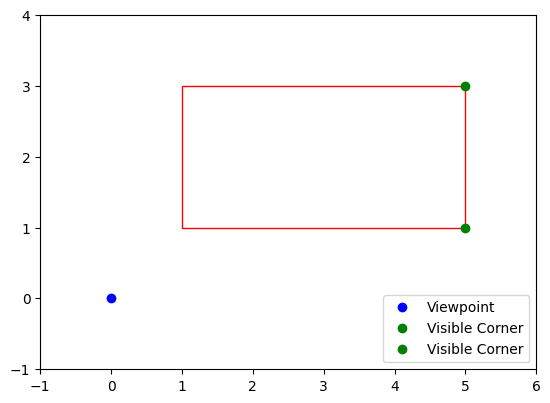

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to determine visibility of corners
def visibility_check(rect_corners, viewpoint):
    # Rect_corners is a list of 4 tuples [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
    # Viewpoint is a tuple (vx, vy)
    
    visible_corners = []
    num_corners = len(rect_corners)
    
    for i in range(num_corners):
        # Get current corner and next corner (modulo for wraparound)
        current_corner = np.array(rect_corners[i])
        next_corner = np.array(rect_corners[(i + 1) % num_corners])
        
        # Vector from viewpoint to current corner and next corner
        v1 = current_corner - viewpoint
        v2 = next_corner - viewpoint
        
        # Cross product to determine the relative orientation
        cross_product = np.cross(v1, v2)
        
        # If cross product is positive, the viewpoint sees this corner
        if cross_product > 0:
            visible_corners.append(current_corner)
    
    return visible_corners

# Example usage
rect_corners = [(1, 1), (5, 1), (5, 3), (1, 3)]
viewpoint = (0, 0)

visible_corners = visibility_check(rect_corners, viewpoint)
print("Visible corners:", visible_corners)

# Visualization
plt.figure()
rect = plt.Polygon(rect_corners, fill=None, edgecolor='r')
plt.gca().add_patch(rect)
plt.plot(viewpoint[0], viewpoint[1], 'bo', label='Viewpoint')
for corner in visible_corners:
    plt.plot(corner[0], corner[1], 'go', label='Visible Corner')

plt.xlim(-1, 6)
plt.ylim(-1, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to check visibility of corners
def get_visible_corners(corners, observer):
    # Get vectors from observer to corners
    cv = corners - observer
    
    # Find index of smallest observer to corner vector
    min_idx = np.argmin(np.linalg.norm(cv, axis=1))
    
    # Get vectors from closest corner to touching index corners
    vmin = corners[min_idx] - observer
    vmin_to_closest = corners[(min_idx - 1) % len(corners)] - corners[min_idx]
    vmin_to_closest = np.hstack((vmin_to_closest, corners[(min_idx + 1) % len(corners)] - corners[min_idx]))
    
    # crosses = np.array([np.cross(vmin, v1), np.cross(vmin, v2)])
    crosses = np.cross(vmin.reshape(1, 2), vmin_to_closest)
    
    print(crosses)
    
    return vmin, v1, v2
    
    
    

# Define the corners of the rectangle
corners = np.array([[1, 1], [5, 1], [5, 4], [1, 4]])

# Define an observer position
observer = np.array([3, 5])

# Get visible corners
vmin, v1, v2 = get_visible_corners(corners, observer)

print(vmin, v1, v2)
# Plot the rectangle and observer position
rectangle = plt.Polygon(corners, fill=None, edgecolor='r')
plt.gca().add_patch(rectangle)

# Plot the corners
for corner in corners:
    plt.scatter(*corner, color='blue')
    plt.text(corner[0] + 0.1, corner[1] + 0.1, f'{corner}', fontsize=12)

# Plot the observer position
plt.scatter(*observer, color='green')
plt.text(observer[0] + 0.1, observer[1] + 0.1, 'Observer', fontsize=12)

# Plot the vectors from their corresponding locations
plt.arrow(*observer, *vmin)
plt.arrow(*(observer+vmin), *v1)
plt.arrow(*(observer+vmin), *v2)

# Highlight visible corners
# for corner in visible_corners:
#     plt.scatter(*corner, color='yellow')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)